<a href="https://colab.research.google.com/github/Nallasamy5325/Imarticus-project/blob/main/CARDIAC_ARRHYTHMIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!unzip '/content/Sowmi.zip'

Archive:  /content/Sowmi.zip
replace data_arrhythmia.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_arrhythmia.csv     


**Import all the Require Libraries**

In [57]:
import numpy as np
import pandas as pd

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [59]:
data = pd.read_csv("/content/data_arrhythmia.csv", sep=';')

In [60]:
data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


**Change the Map of the diagnosis column into 0 and 1**

In [61]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x > 1 else 0)

In [62]:
columns = ['age', 'sex', 'height','weight','diagnosis']
X_columns = ['age','sex','height','weight']
Y_columns = ['diagnosis']

In [63]:
df = data[columns]

**ANALYSIS**

In [64]:
df

,age,sex,height,weight,diagnosis
0,75,0,190,80,1
1,56,1,165,64,1
2,54,0,172,95,1
3,55,0,175,94,0
4,75,0,190,80,1
...,...,...,...,...,...
447,53,1,160,70,0
448,37,0,190,85,1
449,36,0,166,68,1
450,32,1,155,55,0


In [65]:
X = df[X_columns]

In [66]:
Y = df[Y_columns]

**TRAIN TEST SPLIT**

In [67]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)

**LOGISTIC REGRESSION**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.63      0.72      0.67        83
           1       0.58      0.48      0.52        67

    accuracy                           0.61       150
   macro avg       0.61      0.60      0.60       150
weighted avg       0.61      0.61      0.61       150



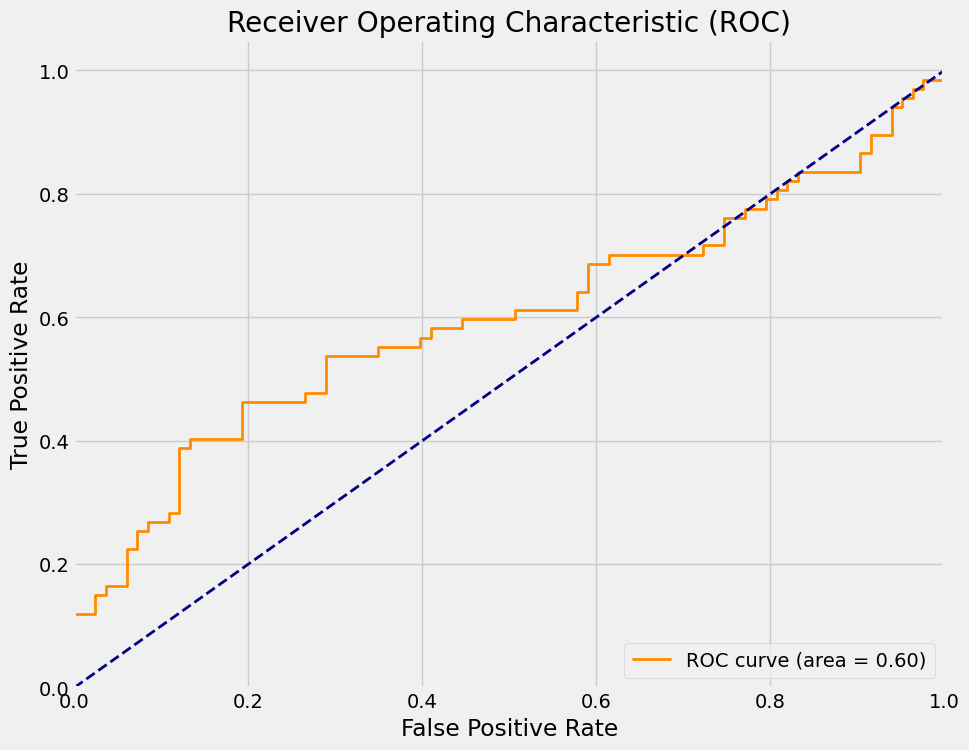

In [68]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt


model = LogisticRegression()
model.fit(X_train, Y_train)


prediction = model.predict(X_test)
prediction_probs = model.predict_proba(X_test)[:, 1]

report = classification_report(Y_test, prediction)
print(report)


fpr, tpr, thresholds = roc_curve(Y_test, prediction_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**CONFUSION MATRIX OF LOGISTIC REGRESSION**

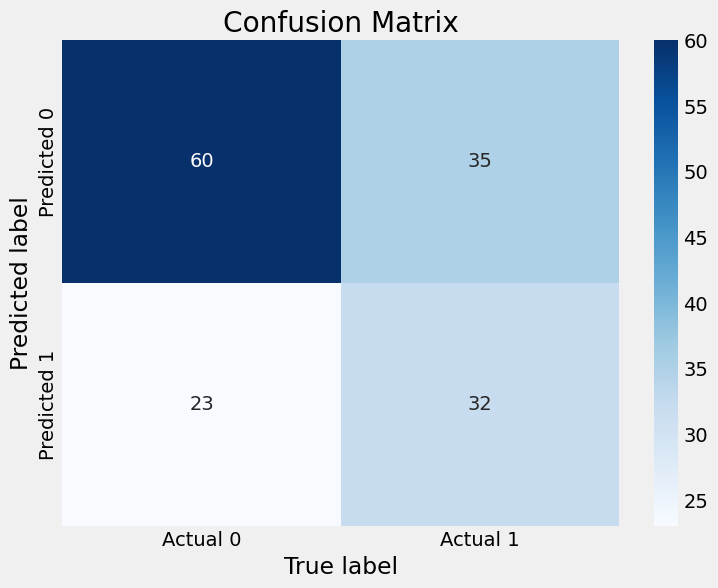

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, annot=True, fmt="d", cmap='Blues',
            yticklabels=['Predicted 0', 'Predicted 1'],
            xticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-70-c1de01ddae5f>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, Y_train)


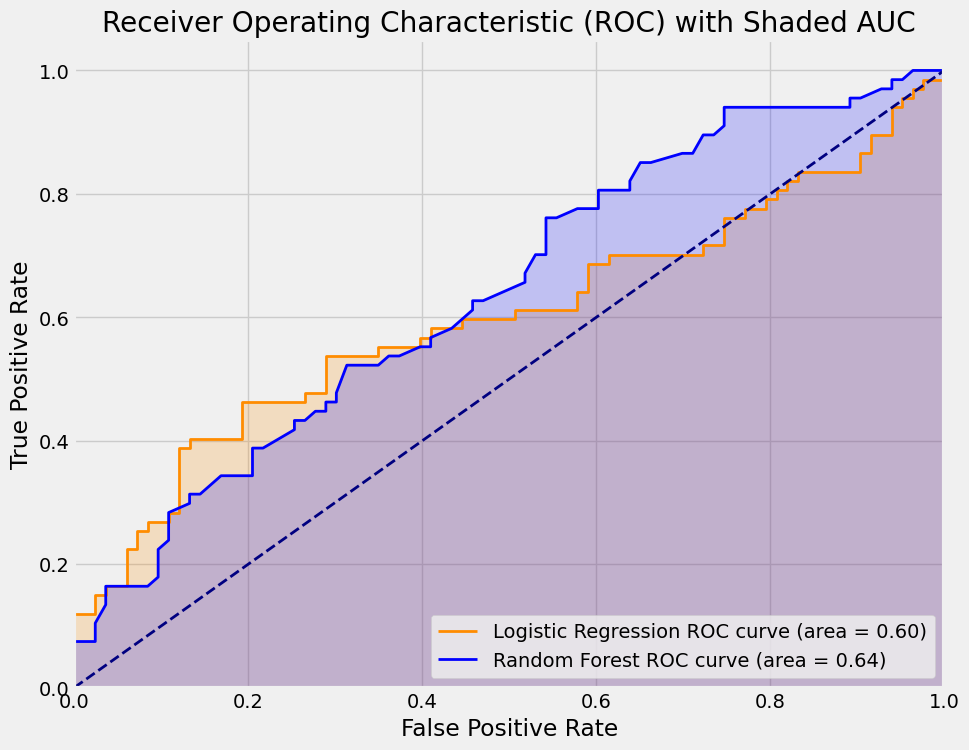

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc



model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, Y_train)
probs1 = model1.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(Y_test, probs1)
roc_auc1 = auc(fpr1, tpr1)

model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, Y_train)
probs2 = model2.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(Y_test, probs2)
roc_auc2 = auc(fpr2, tpr2)


plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc1:.2f})')
plt.fill_between(fpr1, tpr1, color='darkorange', alpha=0.2)
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc2:.2f})')
plt.fill_between(fpr2, tpr2, color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with Shaded AUC')
plt.legend(loc="lower right")
plt.show()

For every column, a MinMaxScaler have been implemented

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [73]:
model_names = ["K-Nearest Neighbors",
               "Decision Tree Classifier",
               "Random Forest Classifier",
               "Gaussian Naive Bayes"]

models = []
predictions = []
pred_probabilities = []

**KNN**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=80)
models.append(knn_model)
knn_model.fit(X_train, Y_train)
knn_predprob = knn_model.predict_proba(X_test)
pred_probabilities.append(knn_predprob)
knn_pred = knn_model.predict(X_test)
predictions.append(knn_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**DECISION TREE CLASSIFIER**

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth = 8,max_features="auto")
models.append(tree_model)
tree_model.fit(X_train, Y_train)
tree_predprob = tree_model.predict_proba(X_test)
pred_probabilities.append(tree_predprob)
tree_pred = tree_model.predict(X_test)
predictions.append(tree_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


**RANDOM FOREST CLASSIFIER**

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rndfor_model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators = 100)
models.append(rndfor_model)
rndfor_model.fit(X_train, Y_train)
rndfor_predprob = rndfor_model.predict_proba(X_test)
pred_probabilities.append(rndfor_predprob)
rndfor_pred = rndfor_model.predict(X_test)
predictions.append(rndfor_pred)

<ipython-input-79-88374ba57b48>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndfor_model.fit(X_train, Y_train)


**GAUSSIAN NAIVE BAYES**

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
nb_model = GaussianNB(var_smoothing = 0.00001)
models.append(nb_model)
nb_model.fit(X_train, Y_train)
nb_predprob = nb_model.predict_proba(X_test)
pred_probabilities.append(nb_predprob)
nb_pred = nb_model.predict(X_test)
predictions.append(nb_pred)
nb_predprob.shape

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(150, 2)

**RESULTS OF THE MODEL**

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [83]:
for name,pred in zip(model_names,predictions):
    print(name,"Accuracy:",round(accuracy_score(Y_test,pred) * 100 , 2),"%")

K-Nearest Neighbors Accuracy: 64.0 %
Decision Tree Classifier Accuracy: 68.67 %
Random Forest Classifier Accuracy: 66.67 %
Gaussian Naive Bayes Accuracy: 62.0 %


In [84]:
for name,pred in zip(model_names,pred_probabilities):
    print(name,"AUROC:",round(roc_auc_score(Y_test,pred[:, 1]) * 100 , 2),"%")

K-Nearest Neighbors AUROC: 69.87 %
Decision Tree Classifier AUROC: 63.58 %
Random Forest Classifier AUROC: 68.15 %
Gaussian Naive Bayes AUROC: 65.26 %
